# ASDSI - Social Network Analysis 2162-F23: Exercise 7

## 2023-03-20 - Lecture 13 

# 3. Network Statistical distributions

## 3.1 Adjacency matrix and edge list

Load the two networks from exercise of Lecture 12, namely Game of Thrones and
your chosen network, using NetworkX. You will therefore have two graphs, for
example named $G_{GoT}$, and $G_{yournet}$. Make sure to build an undirected
network using NetworkX.

In [1]:
# Import the stuff we need
import pandas as pd
import numpy as np
import networkx as nx
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns
import re
from random import shuffle
from itertools import combinations
from collections import Counter
from operator import itemgetter
from statistics import mean
from math import log
from matplotlib import cm # color map

In [2]:
# read Game of Thrones network as undirected graph from edge list
G_GoT = nx.read_edgelist('got_edges.csv', delimiter=",",
                                   create_using=nx.Graph())

### 3.1.1 Compute the degree of each node and calculate the distribution.

In [3]:
got_degrees = dict(G_GoT.degree).values()
degree_count = Counter(got_degrees)

### (a) Plot this distribution (you can use a line plot with markers or a histogram) in (i) linear and (ii) log-log scales
(use matplotlib set_yscale option, default is linear).

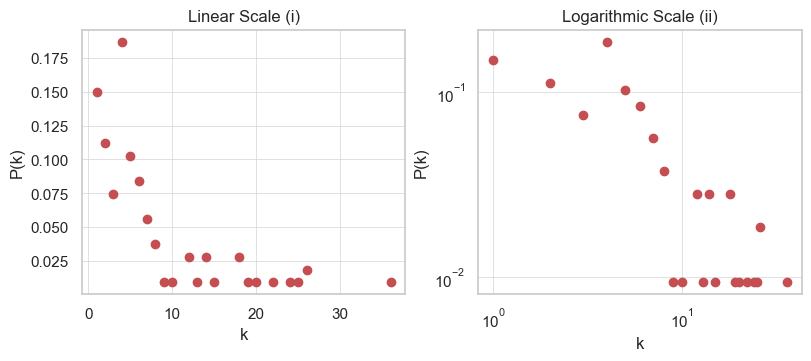

Maximum degree: 36


In [4]:
# make it cleaner 
sns.set(style='whitegrid',
        font_scale=1,
        font='Arial',
        rc={'grid.color':'lightgrey',
          'grid.linewidth': 0.5,})

# sort the degree distribution
lists = sorted(degree_count.items(), key = itemgetter(1)) # sorted by value
x, y = zip(*lists) # unpack the list of keys, counts
# probabilty distribution, use the normalised y values
p_y = y / np.sum(y) #probability of y

fig, ax = plt.subplots(1,2, figsize=(8, 3.5), constrained_layout=True)
ax1, ax2 = ax.flatten()

# make linear plot
ax1.set_title('Linear Scale (i)')
ax1.set_xlabel('k')
ax1.set_ylabel('P(k)')
ax1.plot(x,p_y, "ro")

# make log log plot
ax2.set_title('Logarithmic Scale (ii)')
ax2.set_xlabel('k')
ax2.set_ylabel('P(k)')
ax2.set_yscale("symlog", linthresh=0.01)
ax2.set_xscale("log")
ax2.loglog(x, p_y, "ro")

plt.show()

print(f"Maximum degree: {max(got_degrees)}")

### (b) Do you see any difference between the plots (i) and (ii)? 
Which one is easier to read, providing a better understanding of the connectivity of the   network? Why do you think it is so?

**One possible explanation:**  
The plot on the logarithmic scale allows one to display widely disparate (in magnitude) data on a single chart while retaining detail at the extremes (see Fig. below). Small and large values will be grouped separately in the plot, making them easier to inspect and compare visually. This is particularly useful when plotting data for large networks, where often several data points stay in a tight space (x-y coordinate), making it difficult to differentiate them. It also provides a "normalising" effect on the x-y axis, allowing us to compare networks with different numbers of nodes. More importantly, when one variable changes as a constant power of another, a log-log plot shows the relationship as a straight line. For instance, the trend in panel (ii) could be approximated by a straight line.

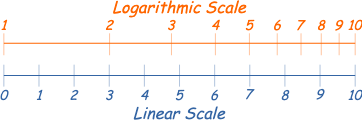
source: [mathsisfun](https://www.mathsisfun.com/definitions/logarithmic-scale.html)

### 3.1.2 Comment on the interpretation of the distributions: 
Explain what a given (x,y) coordinate in this plot means.

**One possible explanation:**  
In the plot above which is normilised, the interpretation of an (x,y) point is straightforward: A value in the y-axis shows the probability of finding a node with the corresponding degree $k_i$.

### 3.1.3 Consider the distribution of the $G_{GoT}$ network.
Does it have hubs? Does this distribution resemble more a fat-tailed distribution or the distribution of a random network? Did you expect this and why?

In [5]:
print(f"Mean degree: {mean(got_degrees):.3f}")

Mean degree: 6.579


**One possible explanation:**  
A hub is a node with $k_i$ that greatly exceeds the $<k>$. Note that this definition is not strict. Since $<k> = 6.57$ in $G_{got}$, we can find several nodes exceeding this value, signalling the presence of hubs. The distribution in $G_{got}$ is indeed fat-tailed as it shows a positive skewness, i.e., the right tail is longer, and the mass of the distribution is concentrated on the left of the plot (i). In a random network, the degree distribution is governed by the probability for edge creation $p$, so most nodes will have a similar degree which is described by a Gaussian distribution. In real networks, the degree distribution is governed by several mechanisms that are not random, and they often depend on the system. Thus, it is not expected that a random link formation can explain the degree distribution of a real-world network.

### 3.1.4 (Optional) 
Compute the distribution for other measures provided by NetworkX,
e.g. eigenvector centrality and shortest path length. Compare the networks, and
look at the range of values and the shape of the distributions. What is the
difference in their shape? Did you expect this difference?

In [6]:
got_eigen_centrality = nx.eigenvector_centrality(G_GoT, max_iter=200)

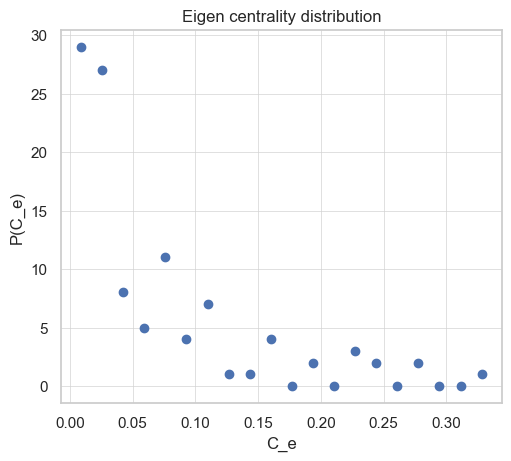

Max eigen centrality: 0.34


In [7]:
n, x, _ = plt.hist(list(got_eigen_centrality.values()), bins = 20)
plt.close()

fig, ax = plt.subplots( figsize=(5, 4.5), constrained_layout=True)
bin_centers = 0.5*(x[1:]+x[:-1])
ax.scatter(bin_centers, n)
ax.set_title('Eigen centrality distribution')
ax.set_xlabel('C_e')
ax.set_ylabel('P(C_e)')
plt.show()

print(f"Max eigen centrality: {max(got_eigen_centrality.values()):.2f}")

In [8]:
def sample_shortest_path_lengths(G, n=100):
    """
    Samples n shortest lengths from random pairs of n nodes in the network
    """
    sp_lengths = []
    
    # extract all nodes and shuffle order
    nodes = list((G.nodes()))
    shuffle(nodes)
    
    # get all pairs of n nodes and shuffle pairs
    node_pairs = list(combinations(nodes[:n], 2))
    shuffle(node_pairs)
    
    # take shortest path length until n lengths is reached
    for source, target in node_pairs:
        if not nx.has_path(G, source, target):
            continue
            
        sp_lengths.append(nx.shortest_path_length(G, source, target))
        if len(sp_lengths) > n:
            break
    
    return sp_lengths

In [9]:
# we are taking a sample because shortest path is computationally expensive
got_shortest_paths = sample_shortest_path_lengths(G_GoT, G_GoT.number_of_nodes())

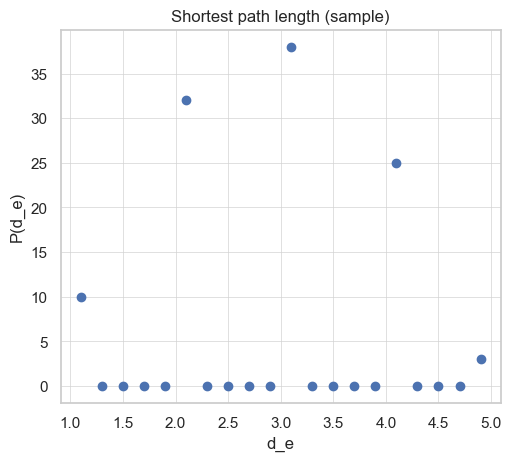

Max shorstes path: 5.00


In [10]:
n, x, _ = plt.hist(got_shortest_paths, bins = 20)
plt.close()

fig, ax = plt.subplots( figsize=(5, 4.5), constrained_layout=True)
bin_centers = 0.5*(x[1:]+x[:-1])
ax.scatter(bin_centers, n)
ax.set_title('Shortest path length (sample)')
ax.set_xlabel('d_e')
ax.set_ylabel('P(d_e)')
plt.show()

print(f"Max shorstes path: {max(got_shortest_paths):.2f}")

**One possible explanation:**  
Same reasoning of the previous question.

## 3.2 Random network model

### 3.2.1
In a random networks the average degree $<k>$ is, statistically speaking, equal to $<k>=p(n-1)$, where $n$ and $p$ correspond to the number of nodes and the probability for edge creation.
Choose an arbitrary number of nodes $n$, then generate three random networks using NetworkX function gnp_random_graph(n, p) such that:  
(a) $<k> \ <1$  
(b) $<k> \ =1$  
(c) $<k> \ >log(n)$  


$<k> = p.(n-1)$  
$\frac{<k>}{(n-1)} = p$  
$p = \frac{<k>}{(n-1)}$


In [11]:
n = 100

# loop over all asked values of <k>
for avg_k in [.9, 1, log(n)]:
    # solve to find the probability needed
    p = avg_k/(n-1)
    G_np = nx.gnp_random_graph(n, p)
    # compute and print <k>
    avg_degree = mean(dict(nx.degree(G_np)).values())
    print(f"Avg. degree:{avg_degree}, p:{p:.3f}")


Avg. degree:0.74, p:0.009
Avg. degree:1.1, p:0.010
Avg. degree:4.58, p:0.047


### 3.2.2 See how the network changes as you increase the probability of edge formation $p$ by plotting the networks using the nx.circular_layout.

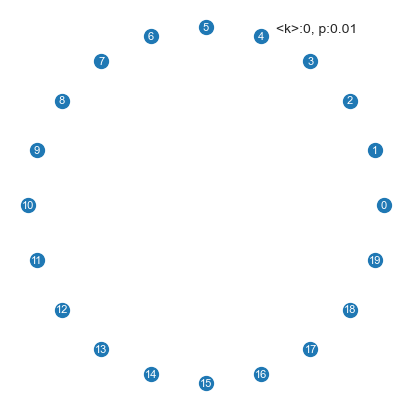

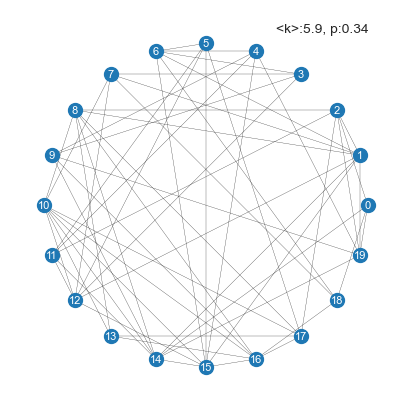

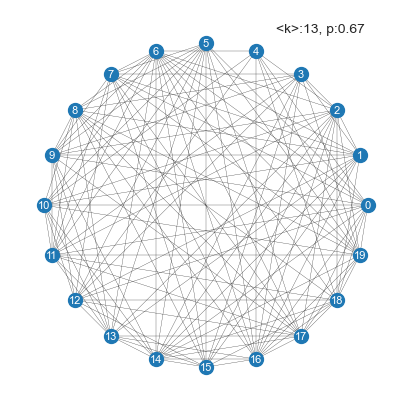

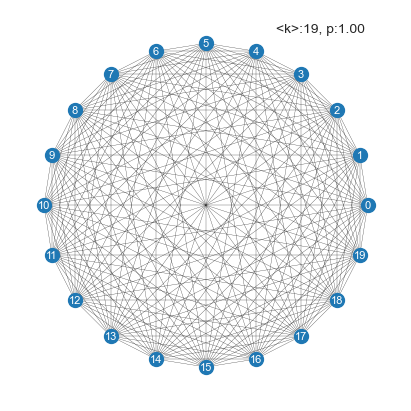

In [12]:
n = 20
params = {'font_size':8, 'with_labels':True, 'font_color':'w',
          'edge_color':'k', 'node_size':100, 'width':0.2,
         'connectionstyle':'arc3,rad=.1'}

# creates a linear space for values of p
p_space = np.linspace(0.01,1, 4)

for p in p_space:
    fig, ax = plt.subplots(figsize=(4, 4), constrained_layout=True)
    G_np = nx.gnp_random_graph(n, p)
    
    nx.draw(G_np, pos=nx.circular_layout(G_np), ax=ax, **params)
    avg_degree = mean(dict(nx.degree(G_np)).values())
    ax.annotate(f"<k>:{avg_degree}, p:{p:.2f}", xy=(.68,.94), xycoords='axes fraction', fontsize=10)
plt.show()

### 3.2.3 (optional) Measure the number of components
(that is how many disconnected subnetworks make up the whole network) for each value of p. What kind of
behaviour do you find?

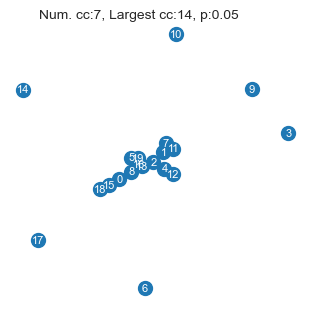

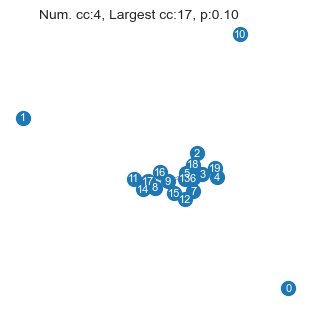

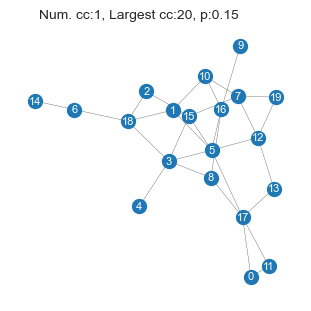

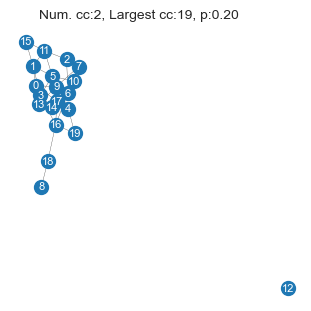

In [13]:
n = 20
params = {'font_size':8, 'with_labels':True, 'font_color':'w',
          'edge_color':'k', 'node_size':100, 'width':0.2,
         'connectionstyle':'arc3,rad=.1'}

p_space = np.linspace(0.05, 0.2, 4)

for p in p_space:
    fig, ax = plt.subplots(figsize=(3, 3), constrained_layout=True)
    G_np = nx.gnp_random_graph(n, p)
    # compute the components
    components = nx.connected_components(G_np)
    n_cc = len([c for c in components])
    max_cc = len(max(nx.connected_components(G_np), key=len))
    # make the layout for drawing
    pos = nx.spring_layout(G_np, iterations=100, seed=123)
    
    nx.draw(G_np, pos=pos, ax=ax, **params)
    ax.annotate(f"Num. cc:{n_cc}, Largest cc:{max_cc}, p:{p:.2f}", xy=(.1,1.01), xycoords='axes fraction', fontsize=10)
plt.show()


**One possible explanation:**  
We can see that a very small probability, $p=0.05$, results in several disconnected components, but the network gets connected as we increase $p$. Indeed, it gets fully connected at a relatively small probability, $p=0.15$. However, if you rerun the code, it might not happen since this is a probabilistic model. For this model type, the fully connected component is obtained computationally through iteration and is not guaranteed.

# 2023-03-22 - Lecture 14

# 4. Network Mesoscale structure

### 4.1.1 
Study the degree correlations of the networks from the previous classes (namely, the Game of Thrones network, and the network of your choice) in the following way:

### (a) Calculate for nodes of degree $k$, the average degree of their neighbors, $k_{nn}(k)$, as explained in class.
 To do this calculation, first
  you have to calculate for each node in the network the average degree of its
  neighbors, using for example the Networkx function **k_nearest_neighbors**.
  Then you average these values for all the nodes that have the same degree $k$,
  obtaining $k_{nn}(k)$. Plot  $k_{nn}(k)$ in function of $k$.

In [14]:
got_knn = nx.average_degree_connectivity(G_GoT)

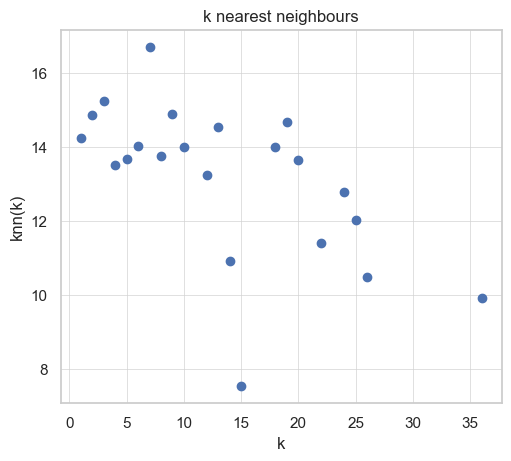

In [15]:
fig, ax = plt.subplots( figsize=(5, 4.5), constrained_layout=True)
x = list(got_knn.keys())
y = list(got_knn.values())
ax.scatter(x, y)
ax.set_title('k nearest neighbours')
ax.set_xlabel('k')
ax.set_ylabel('knn(k)')
plt.show()

### (b) What is the trend of $k_{nn}(k)$? What does it tell us about the degree correlations  in the network?

**One possible explanation**  
Here, the visual analysis offered by the $K_{nn}$ distributions tells us that nodes of high strength (many interactions with many characters) are predominantly connected to nodes with lower strength (fewer interactions with fewer characters).

### (c) Calculate the degree assortativity coefficient in each network, for example using the Networkx function  nx.degree_assortativity_coefficient.
What does this value tell us about  the degree correlations of the two networks?

In [16]:
got_assort = nx.degree_assortativity_coefficient(G_GoT)
print(f"Degree assortativity: {got_assort:.3f}")

Degree assortativity: -0.131


**One possible explanation**  
The negative degree assortativity value comfirms the trend already observed in the $k_{nn}$ distribution: there is tendency of nodes with high degree to connect with nodes with low degree, i.e., the network shows a small level of disassortativity with respect to node strength.

### 4.1.2 Use either the Girvan-Newman method girvan_newman or the modularity maximization louvain_communities to detect the community structure of the Zachary karate club dataset (provided with the exercise and described in the reading material of lecture 14).

**Warning:**. 
Some community discovery algorithms are extremely expensive computationally, especially for large networks. NetworkX in particular has very inefficient implementations of certain algortithms.

The `nx.algorithms.community.centrality.girvan_newman` function of NetworkX returns the Edge Betweenness community hierarchy.  

Next, we write a function that loops over this list, calculates the modularity of the partition (using the `nx.algorithms.community.quality.modularity` function) and returns the best partition of the hierarchy.

In [17]:
def find_eb_communities(G):
    """
    The NetworkX function returns a list. Each element of the list is a partition (a list of
    sets of nodes). We loop over the list of partitions and we calculate the modularity of
    each partition. We keep track of the best modularity value we found so far and of its
    corresponding partition. We then return the best partition we found.
    """
    # calculate community partitions and cast to list
    eb_communities = list(nx.algorithms.community.centrality.girvan_newman(G))
    
    # initialize variables to store best partition
    best_modularity = -1
    best_partition = None
    best_iteration = 0
    
    # loop over partitions
    for idx, partition in enumerate(eb_communities):
        # compute modularity for current partition and update if best
        modularity = nx.algorithms.community.quality.modularity(G, partition)
        if modularity > best_modularity:    
            best_modularity = modularity
            best_partition = partition
            best_iteration = idx
    
    return best_partition, best_iteration, best_modularity

In [18]:
# read Zachary karate club dataset as undirected graph from edge list
G_ZKC = nx.read_edgelist('zkc_edges.txt', delimiter=" ",
                                   create_using=nx.Graph())

partition, iteration, modularity = find_eb_communities(G_ZKC)
print(f"Best partition in iteration: {iteration+1} \nModularity: {modularity:.3f}")

Best partition in iteration: 4 
Modularity: 0.401


In [19]:
partition

({'1', '12', '13', '14', '18', '2', '20', '22', '4', '8'},
 {'25', '26', '28', '29', '3', '32'},
 {'11', '17', '5', '6', '7'},
 {'15', '16', '19', '21', '23', '24', '27', '30', '31', '33', '34', '9'},
 {'10'})

### (a) Draw the network, coloring the communities with different colors. 
You can create a coloramp in matplotlib with the number of colours equivalent to the
number of communities obtained by the algorithms. Then, assign a colour to each
partition (set of nodes) and build a dictionary with the color of each node.
This dictionary can be used as input for the node_color parameter in the
draw function.

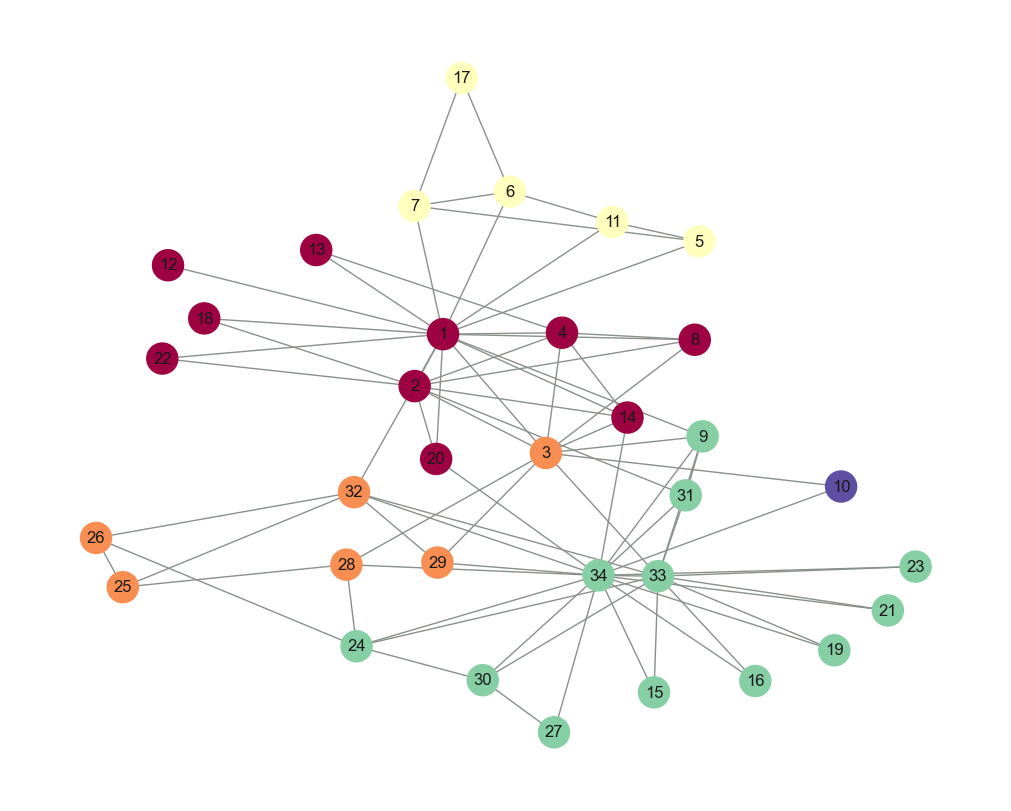

In [20]:
"""
Plots a network using the Kamada Kawai layout and colors nodes by partition (community).
Assumes disjoint partitions (no node has multible communities)
    @G (NetworkX Graph)
    @partition (list/set): list of sets of nodes in each community partition
"""
fig, ax = plt.subplots( figsize=(10, 8), constrained_layout=True)

# get n_parts unique colors from matplotlib color map
n_parts = len(partition)
cmap = cm.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, n_parts)]
partition_cmap = {}

# set color for each node
for idx, nodes in enumerate(partition):
    for node in nodes:
        partition_cmap[node] = colors[idx]

# draw network using Kamada-Kawai
nx.draw_kamada_kawai(G_ZKC, 
                     labels = {n: n for n in G_ZKC.nodes}, 
                     node_color = [partition_cmap[node] for node in G_ZKC.nodes],
                     node_size=500, edge_color='#89918b')
plt.show()

### (b) Do you recover the communities that were formed in the actual splitting of the Karate club?

**Some comments**  

😅 Ops, that didn't work well did it? That's the lesson for today: finding communities by maximizing modularity has several limitations, don't be fooled by its popularity. Tough, the matter of community detection in networks is itself a subfield in Network Science that we can't fully cover here. But if you are interested, Chapter 32 of [The Atlas for the Aspiring Network Scientist](https://www.networkatlas.eu/) is a great start.

**Ground truth data**  

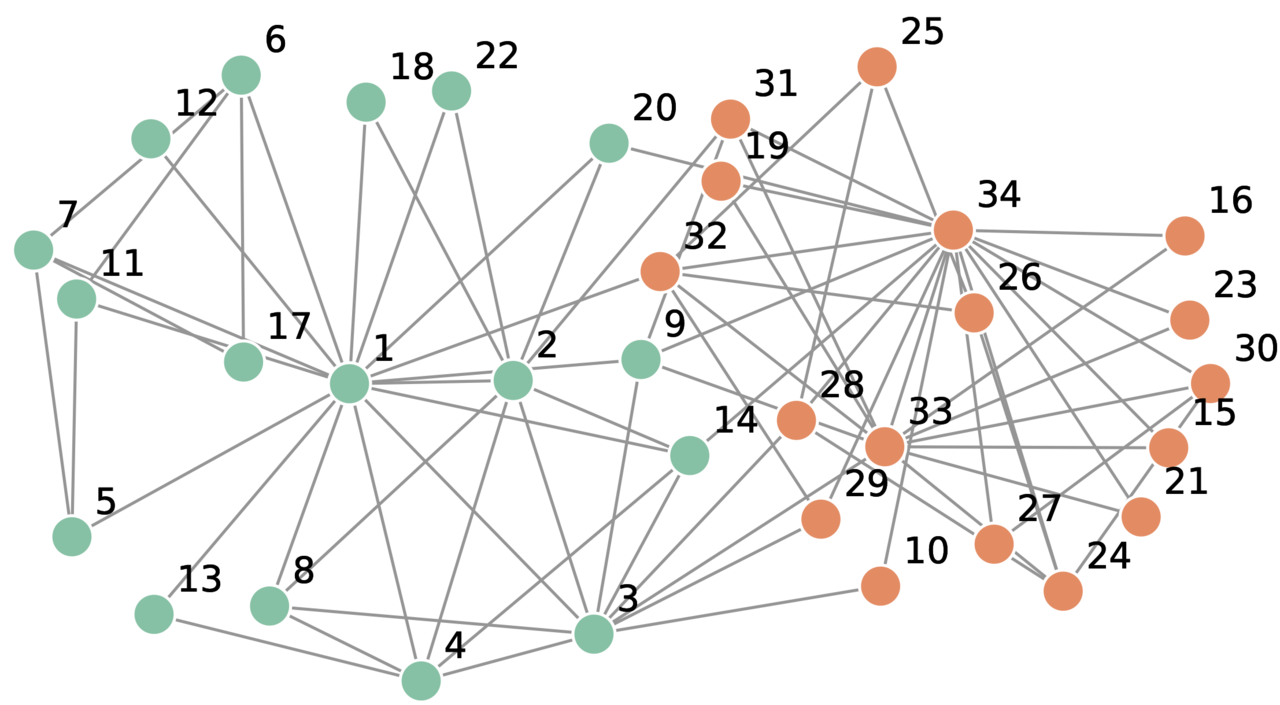

Source: [wikipedia](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)